Load Glutamatergic and GABAergic Data

In [2]:
import scanpy as sc
import numpy as np
import random
import matplotlib.pyplot as plt
import scanpy.external as sce
import nsforest as ns
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
random.seed(66)

data_path = "G:/Shared drives/Opossum transcriptomics/Data/Mouse_M1/"

adata = sc.read_h5ad(data_path + "Mouse_M1_All_Clustered.h5ad")
adata

AnnData object with n_obs × n_vars = 159738 × 31053
    obs: 'class_label', 'cluster_label', 'batch', 'n_counts', 'leiden', 'class'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'class_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
adata = adata[np.isin(adata.obs["class"], ["glutamatergic", "GABAergic"]), :]
del adata.uns
del adata.obsm
del adata.varm
del adata.obsp

In [4]:
adata.X = adata.raw.X

Analyze Glutamatergic Cells

In [5]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

extracting highly variable genes
    finished (0:00:11)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:33)


2023-05-15 12:29:24,567 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-05-15 12:29:51,333 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-05-15 12:29:52,081 - harmonypy - INFO - Iteration 1 of 10
2023-05-15 12:30:58,983 - harmonypy - INFO - Iteration 2 of 10
2023-05-15 12:32:05,688 - harmonypy - INFO - Iteration 3 of 10
2023-05-15 12:33:12,341 - harmonypy - INFO - Iteration 4 of 10
2023-05-15 12:34:18,983 - harmonypy - INFO - Iteration 5 of 10
2023-05-15 12:35:25,907 - harmonypy - INFO - Iteration 6 of 10
2023-05-15 12:36:32,956 - harmonypy - INFO - Iteration 7 of 10
2023-05-15 12:37:26,094 - harmonypy - INFO - Converged after 7 iterations


computing neighbors


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:38)
running Leiden clustering
    finished: found 25 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:33)


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


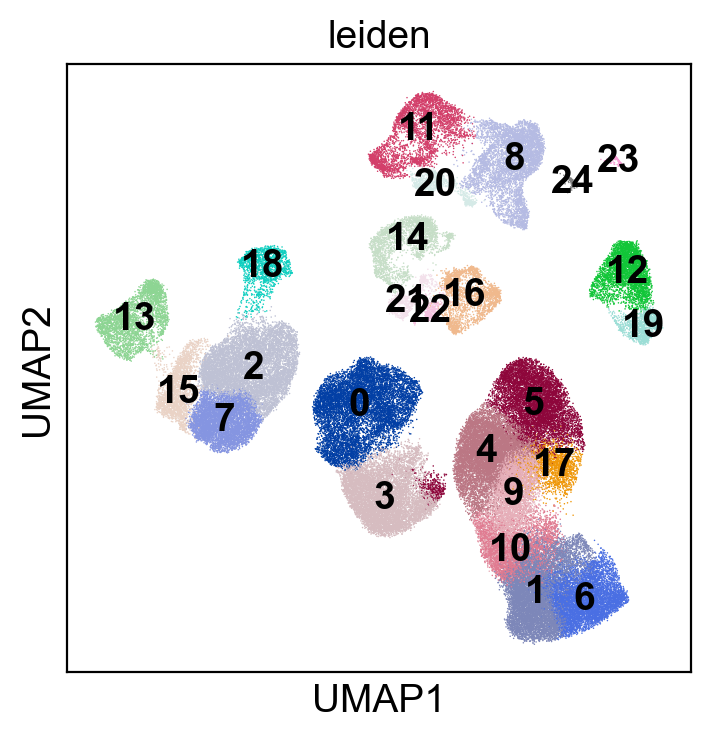

In [6]:
sc.tl.pca(adata, svd_solver="arpack")
sce.pp.harmony_integrate(adata, "batch")
sc.pp.neighbors(adata, n_neighbors=25, use_rep="X_pca_harmony")
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"], legend_loc="on data")

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


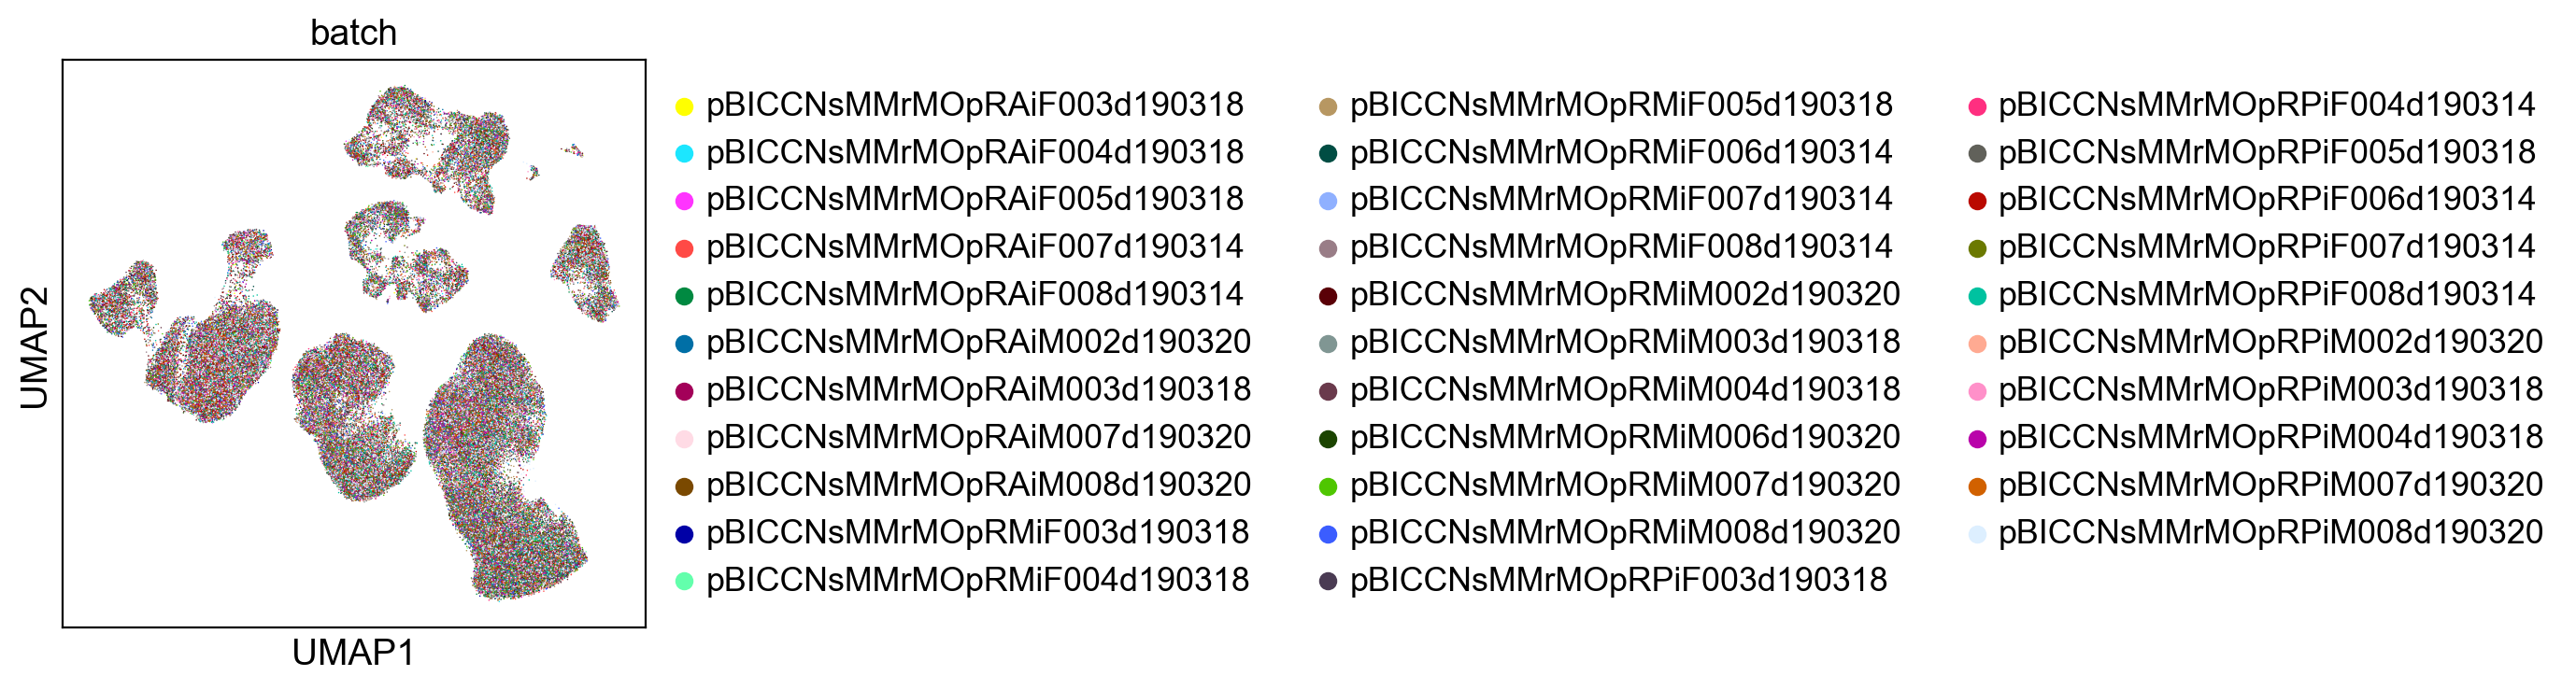

In [7]:
sc.pl.umap(adata, color=["batch"])

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


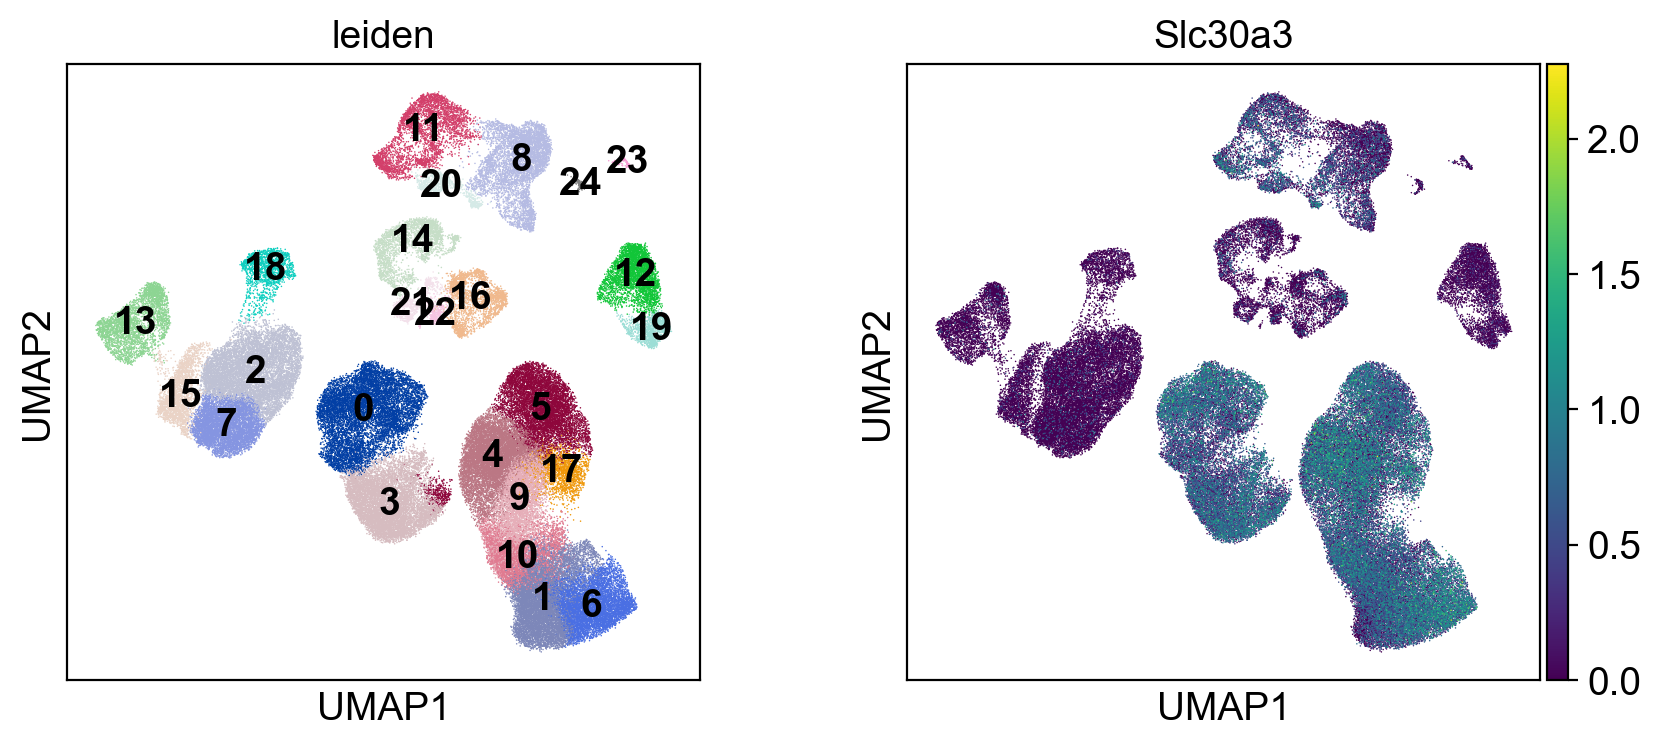

In [16]:
sc.pl.umap(adata, color=["leiden", "Slc30a3"], legend_loc="on data")

categories: 0, 1, 2, etc.
var_group_labels: General, 2/3, 2/3 & 4, etc.


C:\Ryan\GitHub\scanpy\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


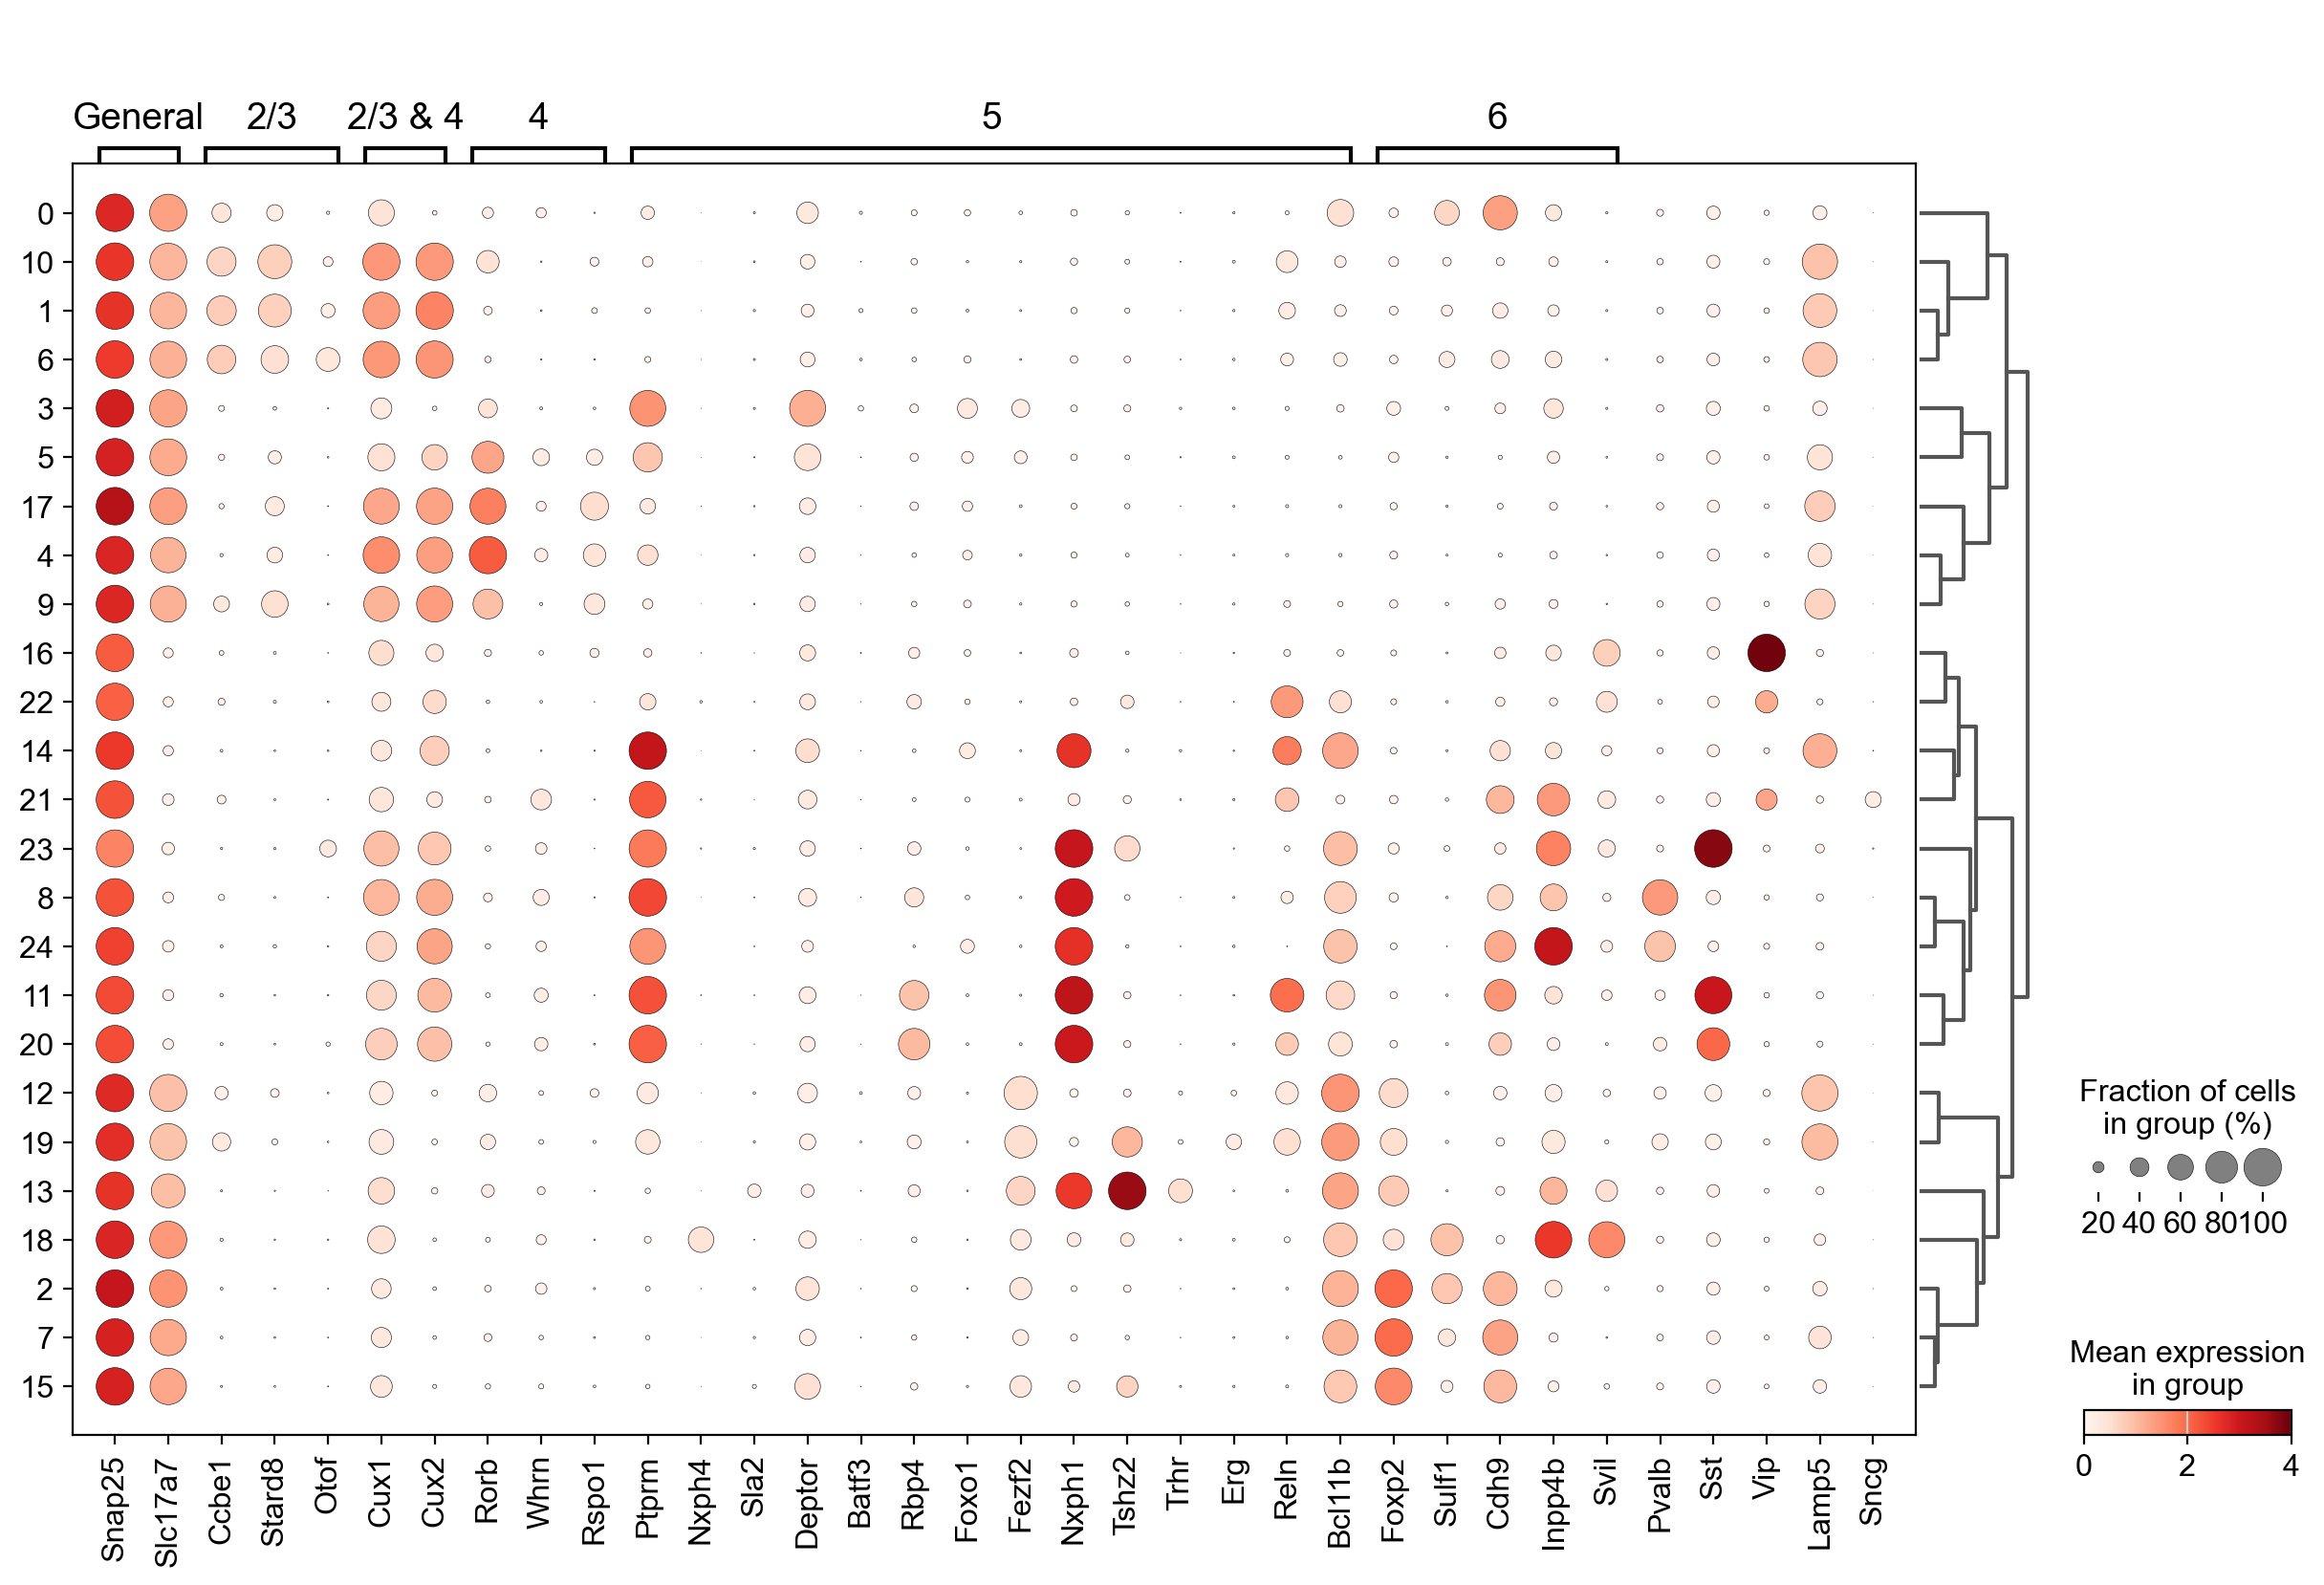

In [18]:
glutamatergic_markers = [
                         "Snap25", "Slc17a7", # general
                         "Ccbe1", "Stard8", "Otof", # L2/3
                         "Cux1", "Cux2", # L2/3 & L4
                         "Rorb", "Whrn", "Rspo1", # L4
                         "Ptprm", "Nxph4", "Sla2", 
                         "Deptor", "Batf3", "Rbp4", "Foxo1", "Fezf2", "Nxph1", "Tshz2", "Trhr", "Erg", "Reln", "Bcl11b", # L5
                         "Foxp2", "Sulf1", "Cdh9", "Inpp4b", "Svil" # L6
                        ]

GABAergic_markers = [
                     "Pvalb", 
                     "Sst", 
                     "Vip", 
                     "Lamp5", 
                     "Sncg", 
                     ]

sc.pl.dotplot(
    adata, 
    glutamatergic_markers + GABAergic_markers, 
    groupby="leiden", 
    dendrogram=True, 
    vmin=0, vmax=4, 
    var_group_positions=[(0, 1), (2, 4), (5, 6), (7, 9), (10, 23), (24, 28)], 
    var_group_labels=["General", "2/3", "2/3 & 4", "4", "5", "6"], 
    var_group_rotation=0, 
            )

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


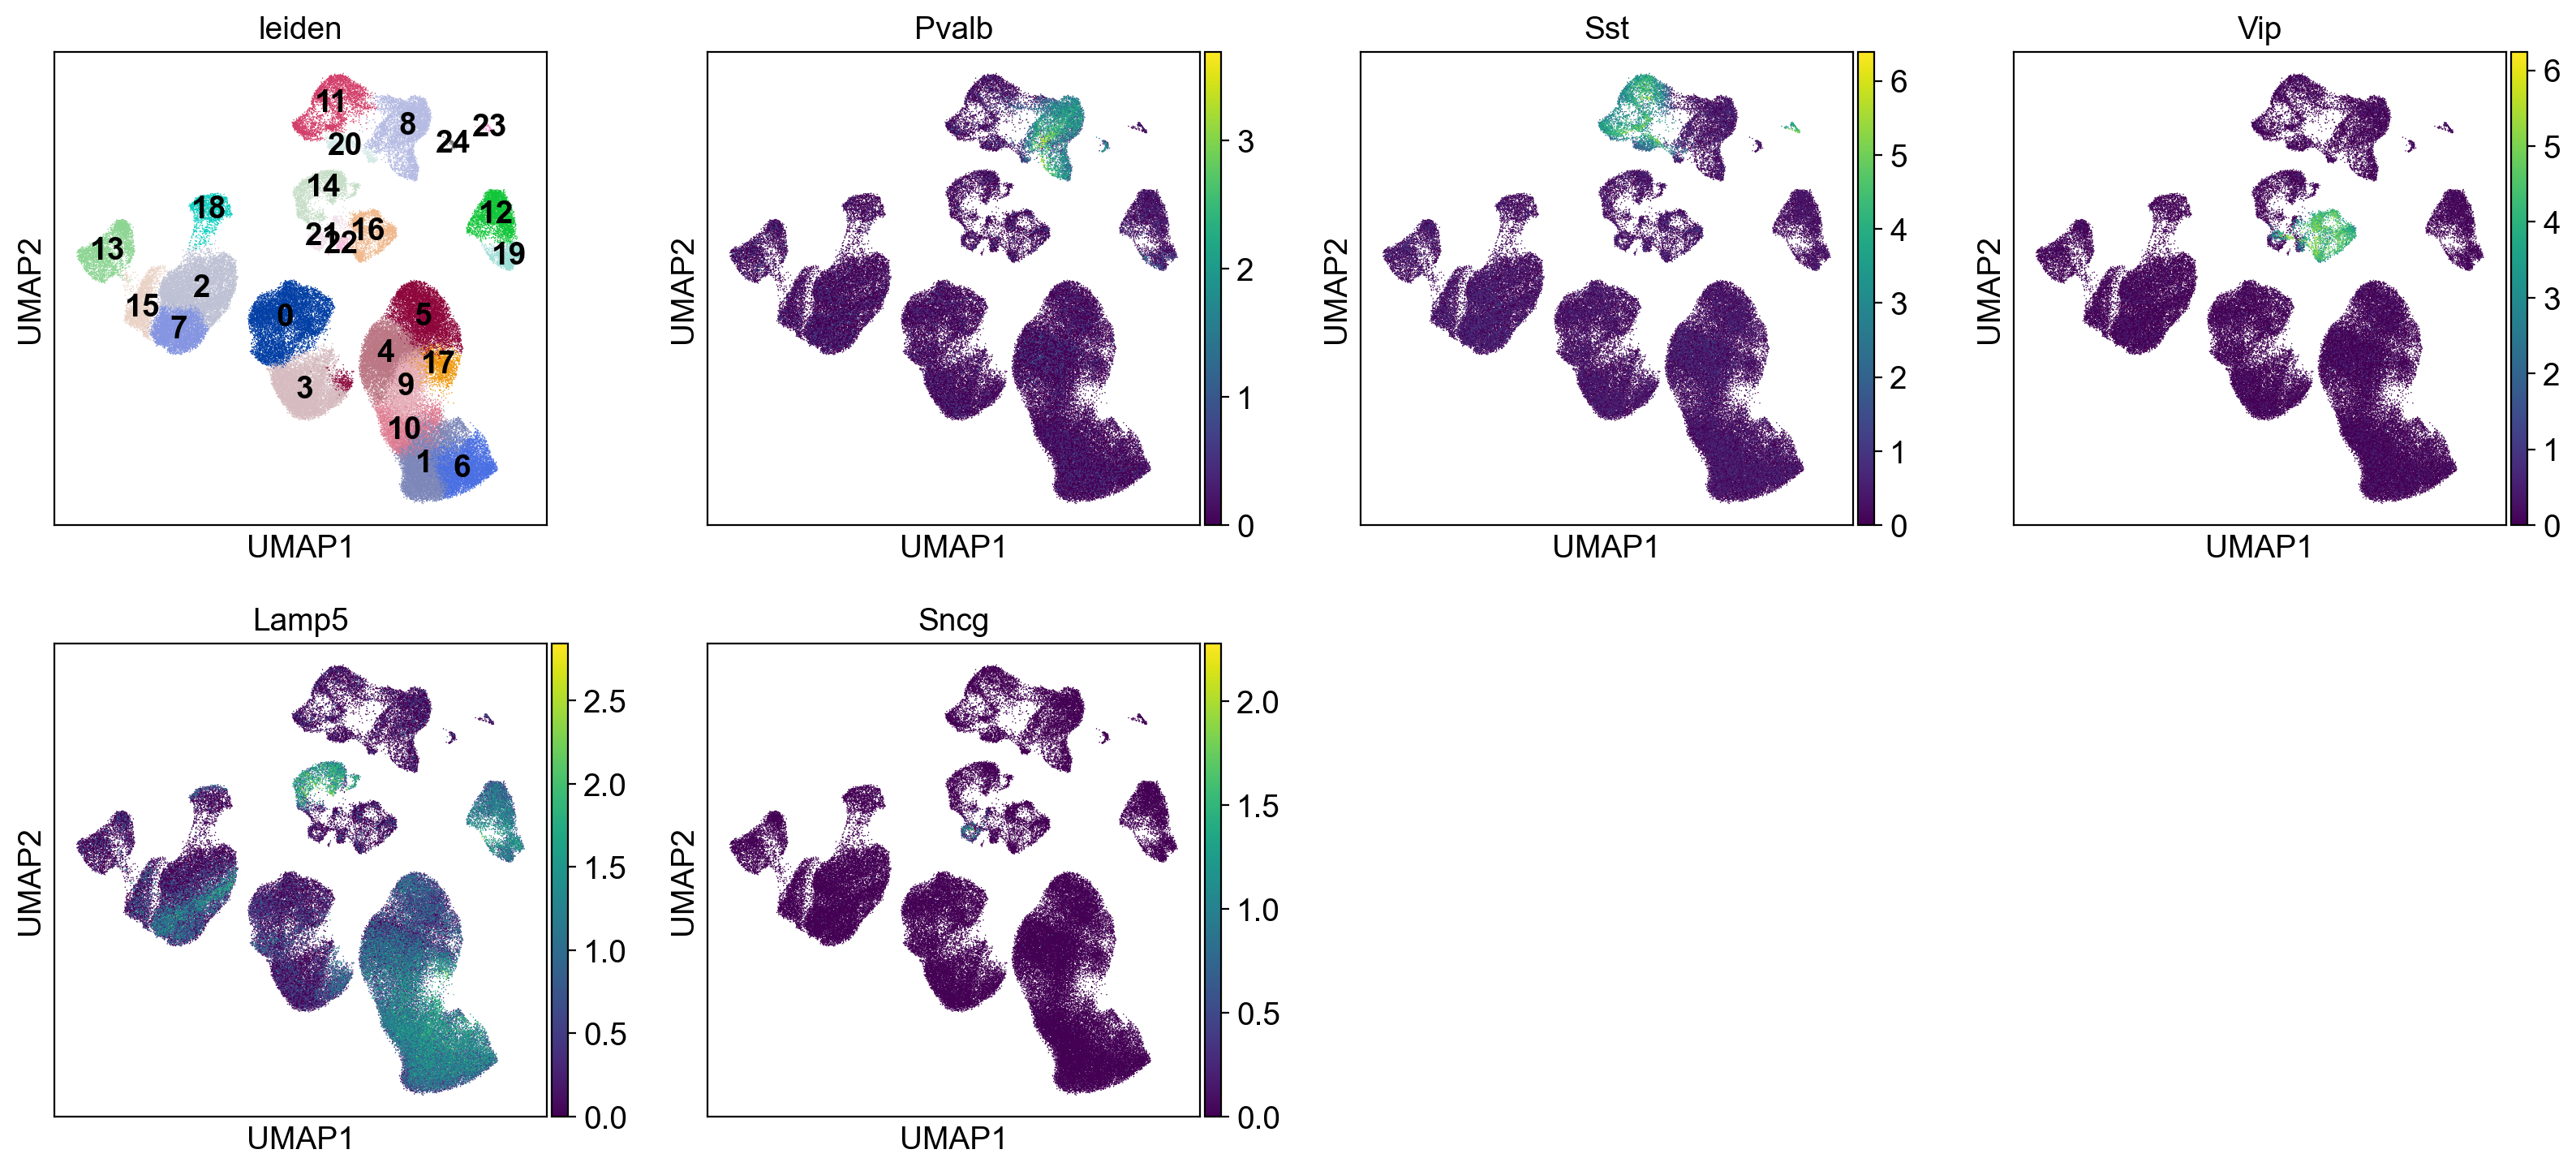

In [17]:
sc.pl.umap(adata, color=["leiden", "Pvalb", "Sst", "Vip", "Lamp5", "Sncg"], legend_loc="on data")

Label Subclasses via Marker Genes

In [2]:
subclass_idx = {
            "L23" : ["0", "4", "10", "18"], 
            "L45" : ["2", "5", "8", "14"], 
            "L5IT" : ["1"], 
            "L5ET" : ["11", "17"], 
            "L5NP" : ["12"], 
            "L6IT" : ["6", "7"], 
            "L6CT" : ["3", "9", "13", "15"], 
            "L6b" : ["16"], 
            "PV" : ["8"], 
            "SST" : ["11", "20"], 
            "VIP" : ["16"], 
            "Lamp5" : ["14"], 
            "Sncg" : ["21"], 
               }

adata.uns["subclass_idx"] = subclass_idx

adata.obs["subclass"] = [None] * adata.shape[0]

for name, idx in subclass_idx.items():
    mask = np.isin(adata.obs["leiden"], idx)
    adata.obs.loc[mask, "subclass"] = [name] * np.sum(mask)

In [12]:
adata

AnnData object with n_obs × n_vars = 101477 × 31053
    obs: 'class_label', 'cluster_label', 'batch', 'n_counts', 'leiden', 'class'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'batch_colors', 'cluster_label_colors', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


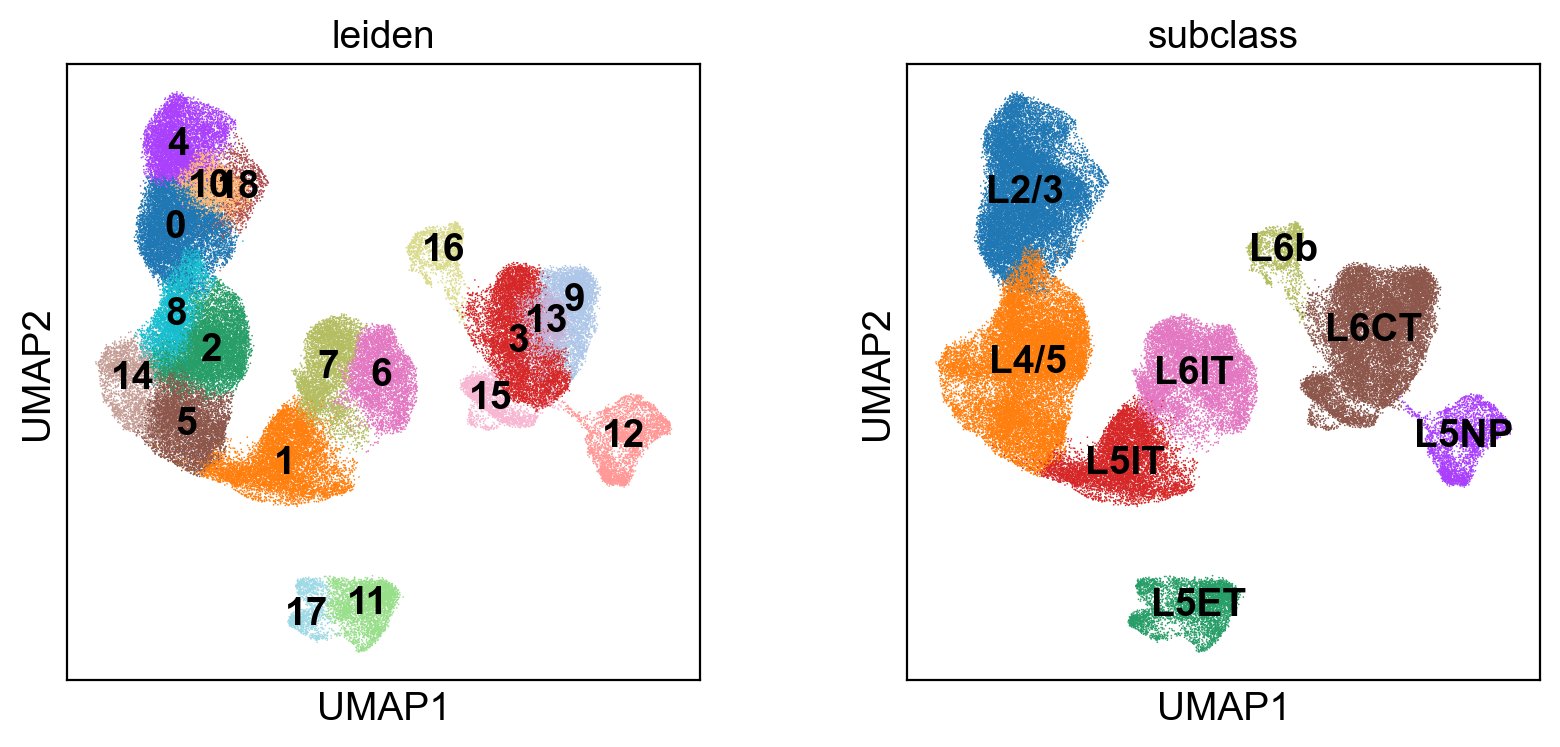

In [13]:
sc.pl.umap(adata, color=["leiden", "class", "subclass"], legend_loc="on data")